## Importing the required libraries

In [130]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

## Loading and displaying the original image

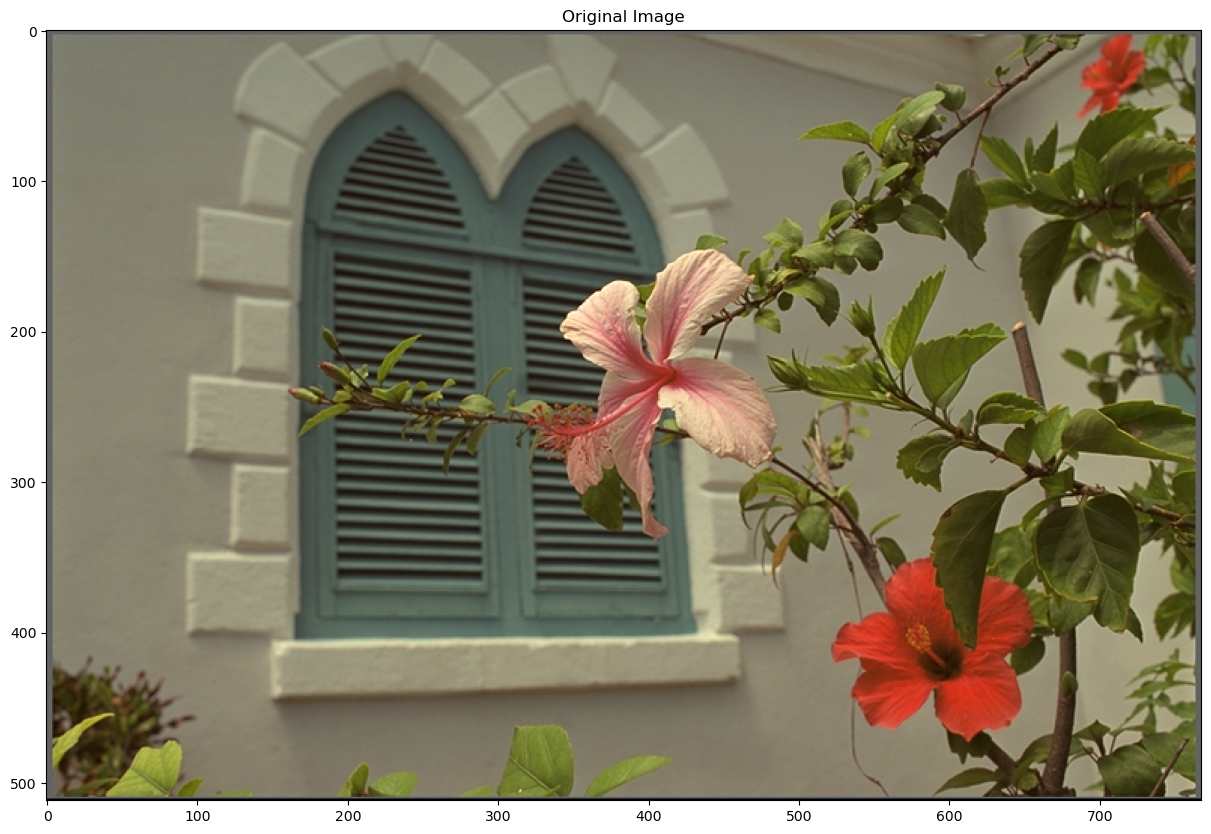

In [132]:
img = cv2.imread('img/kodim07.png')  # Loading the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting the image from BGR to RGB
plt.imshow(img)  # Displaying the original image
plt.title("Original Image")
plt.show()

## Creating a blurred version of the image

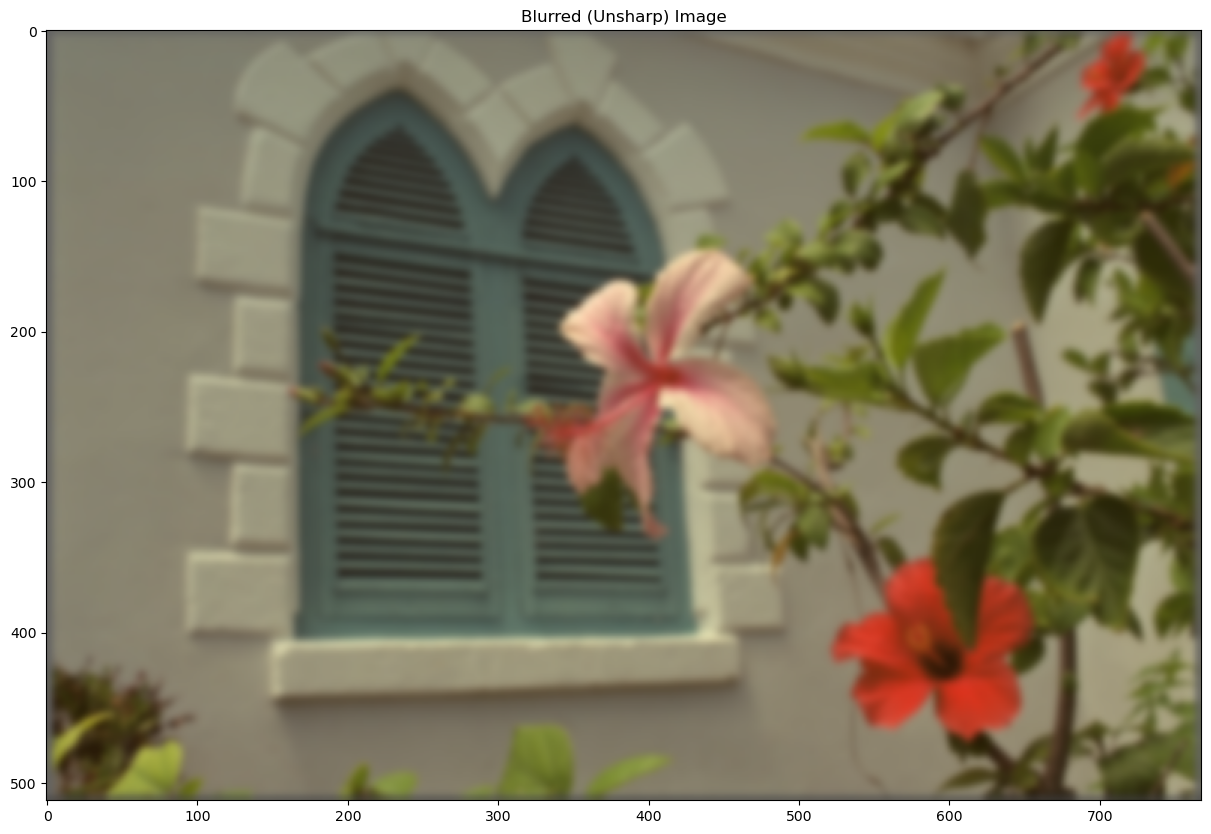

In [134]:
# Applying Gaussian Blur to create an unsharp version of the image
unsharp = cv2.GaussianBlur(img, (15, 15), 0) 
plt.imshow(unsharp)
plt.title("Blurred (Unsharp) Image")
plt.show()

## Calculating the difference image

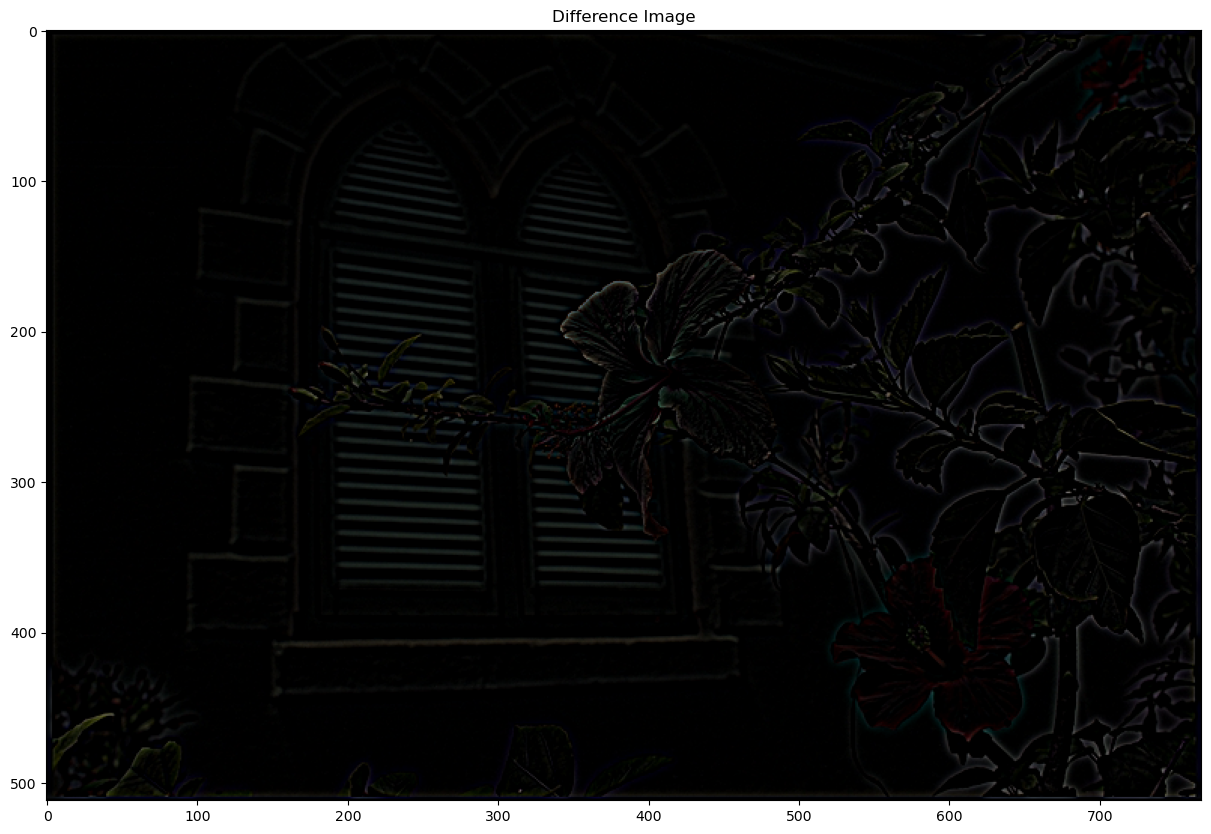

In [136]:
# Calculating the difference between the original and blurred image
original_float = img.astype(np.float32)
unsharp_float = unsharp.astype(np.float32)
diff = original_float - unsharp_float

# Displaying the difference image
plt.imshow(np.clip(diff, 0, 255).astype(np.uint8))  
plt.title("Difference Image")
plt.show()

## Applying the unsharp masking formula

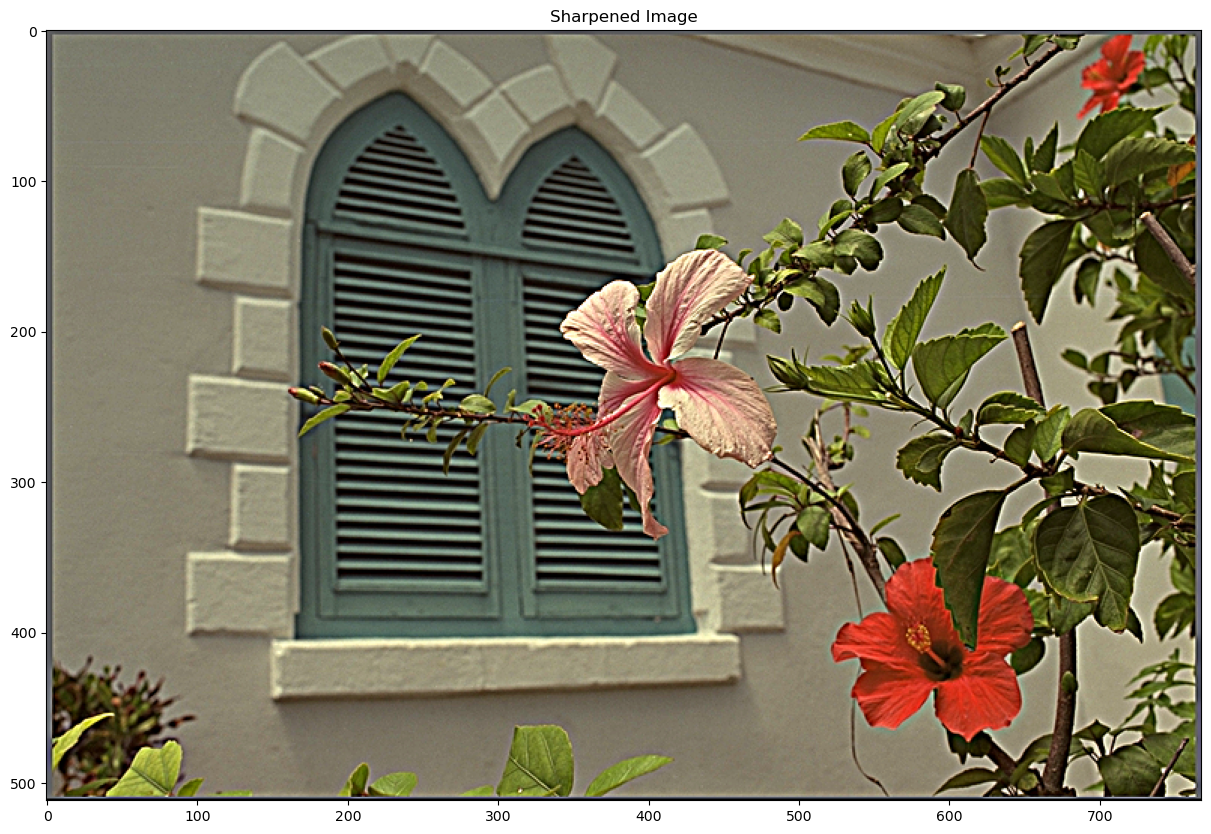

In [138]:
# Setting the amount parameter for sharpening
amount = 1.5  

# Applying the USM formula
sharpened = original_float + diff * amount

# Clipping to ensure values remain in valid range for display
sharpened_clipped = np.clip(sharpened, 0, 255).astype(np.uint8)

plt.imshow(sharpened_clipped)
plt.title("Sharpened Image")
plt.show()


### Questions
* What is a good (reasonable) value for the amount parameter?

Normally, an amount in the range of 0.5 to 1.5 is considered reasonable. At these values, the sharpening effect becomes noticeable, but without excessive enhancement that could lead to artifacts or noise.



* What happens if it is too small?

If the amount is too small (e.g. less than 0.3), the effect will be almost imperceptible, as if no filter was applied at all.




* What happens if it is too large?

If you overestimate the amount value (for example, more than 3), you will start to see strong artifacts. The edges of objects will look overexposed or with bright halos, which basically ruins the nature look of the image. At worst, noise may appear, especially in textures like skin or backgrounds. In general, Everything will look over-processed and artificial.